# fb testing

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import pickle
import dask as pd
import pandas as pd_old
import warnings
import utils
import heartpy as hp
from ECG_feature_extractor_1001 import *
# import time 
import time
from datetime import datetime
from biosppy.signals import ecg
from feature_extraction import SubjectData, compute_features, get_samples, combine_files

# To ignore all warnings:
warnings.filterwarnings("ignore", module="numpy")

In [ ]:
WINDOW_IN_SECONDS = 60
stride = 1
label_dict = {'baseline': 1, 'stress': 2, 'amusement': 0}
int_to_label = {1: 'baseline', 2: 'stress', 0: 'amusement'}
feat_names = None
loadPath = '../data/WESAD'
savePath = '../data/GN-WESAD'
subject_feature_path = '/subject_feats'
onedrive = '/mnt/d/Users/alkurdi/OneDrive - University of Illinois - Urbana/data/GN-WESAD'
n_samples = 10 
subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
snrs = [ 0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6] #0.00001,
fb_model_list = ['DT', 'RF', 'LDA', 'KNN', 'AdaBoost', 'SVM']

if not os.path.exists(savePath):
    os.makedirs(savePath)
if not os.path.exists(savePath + subject_feature_path):
    os.makedirs(savePath + subject_feature_path)

In [ ]:
def get_processing_status(snrs, subject_ids, onedrive, n_samples= 10):
    #bads are the ones that do not have the gaussian-modified data.  
    bads = []
    bad_snrs = []
    bad_subjects = []
    bad_ns = []
    completed_snrs = []
    for n_i in range(n_samples):
        for snr in snrs:
            for subject_id in subject_ids:
                #print(snr)
                
                #print(f'{onedrive}/n_{n_i}/snr_{snr}/S{subject_id}/{a}')
                try: 
                    a = os.listdir(f'{onedrive}/n_{n_i}/snr_{str(snr)}/S{subject_id}')
                    a[0]
                    completed_snrs.append(snr)
                except:
                    bads.append(f'n_{n_i}/snr_{snr}/S{subject_id}')
                    bad_snrs.append(snr)
                    bad_subjects.append(subject_id)
                    bad_ns.append(n_i)

    bad_snrs = sorted(set(bad_snrs))
    bad_subjects = sorted(set(bad_subjects))
    bad_ns = sorted(set(bad_ns))
    completed_snrs = sorted(set(completed_snrs))
    #printing after checking
    print(f'completed snrs :{completed_snrs}')
    print(f'incomplete snrs :{bad_snrs}')
get_processing_status(snrs, subject_ids, onedrive, n_samples= n_samples)

In [ ]:
dataset_list = []
for i in os.listdir(f'{loadPath}/subject_feats'):
    #print (i)
    if 'S' not in i[0]:
        dataset_list.append(i)
        
            
            

In [ ]:
model_results = {}

for each_dataset in dataset_list:
    for snr in snrs:
        for model in fb_model_list:
            pass 

In [8]:
import os
savePath = 'C:/Users/alkurdi/Downloads/WESAD/GN-WESAD'
n_samples = [9]
subject_ids = [2]
snrs = [0.01]
for n_i in n_samples:
    if not os.path.exists(savePath + '/n_'+str(n_i)):
        os.makedirs(savePath + '/n_'+str(n_i))
    for snr in snrs:
        if not os.path.exists(savePath + '/n_'+str(n_i)+'/snr_'+str(snr)):
            os.makedirs(savePath + '/n_'+str(n_i)+'/snr_'+str(snr))
        for subject_id in subject_ids:
            if not os.path.exists(savePath + '/n_'+str(n_i)+'/snr_'+str(snr)+ '/S'+str(subject_id)):
                os.makedirs(savePath + '/n_'+str(n_i)+'/snr_'+str(snr)+ '/S'+str(subject_id))
            

In [29]:
print(f'{savePath}/n_{n_i}')
print(os.path.isdir(f'{savePath}/n_{n_i}'))
print(os.listdir(f'{savePath}/n_{n_i}'))
print(os.path.isdir(f'{savePath}/n_{n_i}/snr_{snr}/fixed_resampled140hz_S{subject_id}.pkl'))

with open(f'{savePath}/n_{n_i}/poop.txt', 'w') as f:
    f.write('poop')


C:/Users/alkurdi/Downloads/WESAD/GN-WESAD/n_9
True
['poop.txt', 'snr_0.01']
False


In [ ]:
results_table = pd_old.DataFrame(columns=['SNR', 'Accuracy', 'F1-Score', 'dataset'])
results_table.loc[str('SVM')] = pd_old.Series({'SNR':1, 'Accuracy':5, 'F1 Score':2, 'dataset':'WESAD'})
results_table.loc[str('RF')] = pd_old.Series({'SNR':1, 'Accuracy':5, 'F1 Score':2, 'dataset':'WESAD'})
'''
fb_model_list = ['SVM', 'RF']
for model in fb_model_list:
    for i in range(len(snrs)):
        results_table.loc[str(model) + str(snrs[i])] = pd.Series({'SNR':snrs[i], 'Accuracy':svm_accuracy[i], 'F1 Score':2, 'dataset':'WESAD'})
'''
display(results_table)

In [ ]:

start = time.time()

ecg_biosppy = ecg
ecg = None
fs_ecg = 700
fs_ppg = 64
subject_id=2 


In [ ]:
subject = SubjectData(main_path=loadPath, subject_number=subject_id)
data_dict = subject.get_wrist_and_chest_data()

In [ ]:
ecg = data_dict['ECG'][40000:60000].flatten()
ppg = data_dict['BVP'][int(40000/700*64):int(60000/700*64)].flatten()
print('ecg len', len(ecg))
print('ppg len', len(ppg))


#testing for ECG

now = time.time()
#wd4, m4 = hp.process(ecg, fs_ecg)
#print('hp.process execution time is %5.2fs' % (time.time()-now))

now = time.time()
#pack2, ecgout2, time_dict2 = freq_ratio_hybrid(ecg, fs_ecg, RR1, method='welch', factor = 1)
#print('freq_ratio_hybrid execution time is %5.2fs' % (time.time()-now))



In [ ]:
now = time.time()
BS_signal_analysis3, pack3, ecg_out3 = analyze_ecg(ecg, fs_ecg)
print('analyze_ecg execution time is ', now-time.time())


In [ ]:
ecg = data_dict['ECG'][10000:80000].flatten()


In [ ]:
#testing for PPG

now = datetime.now()
pack, ppg, RR, time_dict = freq_ratio( ppg, fs_ppg, method='welch', factor = 1)
print('freq_ratio execution time is ', now-time.time())

now = datetime.now()
pack, ppg, time_dict = freq_ratio_hybrid(ppg, fs_ppg, method='welch', factor = 1)
print('freq_ratio_hybrid execution time is ', now-time.time())

now = datetime.now()
BS_signal_analysis, pack, ppg_out = analyze_ecg(ppg, fs_ppg)
print('analyze_ecg execution time is ', now-time.time())

now = datetime.now()
wd, m = hp.process(ppg, fs_ppg)
print('hp.process execution time is ', now-time.time())

now = datetime.now()
pack, ppg, RR = freq_ratio_fast( ppg, fs_ppg, method='welch', factor = 1)
print('freq_ratio_fast execution time is ', now-time.time())

In [ ]:
subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
import logging


def combine_noiZ_files(subject_ids):
    today = datetime.now().strftime('%Y-%m-%d')
    logging.basicConfig(level=logging.DEBUG, filename=today+'-combine.log', filemode='w', force=True)
    logging.info('Started')
    print('total number of combines: ', len(snrs)*n_samples)
    df_list = []
    i = 0
    for snr in snrs:
        for n_i in range(n_samples):
            for s in subject_ids:
                df = pd_old.read_csv(f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/S{s}_feats.csv', index_col=0)
                df['subject'] = s
                df_list.append(df)
            df = pd_old.concat(df_list)
            df['label'] = (df['0'].astype(str) + df['1'].astype(str) + df['2'].astype(str)).apply(lambda x: x.index('1'))
            df.drop(['0', '1', '2'], axis=1, inplace=True)
            df.reset_index(drop=True, inplace=True)
            now = datetime.now().strftime('%Y-%m-%d')
            df.to_csv(f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/{now}_feats_filt.csv')
            i+=1
            logging.info(f'Saved file to: {savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/{today}_feats_filt.csv  {i}/{len(snrs)*n_samples}')
            print('Saved file to: ',f'.../n_{n_i}/snr_{snr}{subject_feature_path}/{now}_feats_filt.csv   {i}/{len(snrs)*n_samples}')
            counts = df['label'].value_counts()
            logging.info('Number of samples per class:')
            logging.info('baseline: {0[1]}; stress: {1[1]}; amusement: {2[1]} '.format(*list(zip(counts.index, counts.values))))
    logging.info('all done!')

In [ ]:
combine_noiZ_files(subject_ids)
# took 19m 30s to run

In [ ]:
import pandas as pd
import os
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor
import logging
now = datetime.now().strftime('%Y-%m-%d')

def process_subject_file(snr, n_i, s):
    file_path = f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/S{s}_feats.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, index_col=0)
        df['subject'] = s
        return df
    return None

def combine_noiZ_files(subjects):
    now = datetime.now().strftime('%Y-%m-%d')
    logging.basicConfig(level=logging.INFO, filename=now+'-combine.log', filemode='w', force=True)

    for snr in snrs:
        for n_i in range(n_samples):
            # Parallelize file reading
            with ThreadPoolExecutor(max_workers=10) as executor:
                futures = [executor.submit(process_subject_file, snr, n_i, s) for s in subjects]
                df_list = [future.result() for future in futures if future.result() is not None]

            if df_list:
                df = pd.concat(df_list)
                df['label'] = df[['0', '1', '2']].idxmax(axis=1)
                df.drop(['0', '1', '2'], axis=1, inplace=True)
                df.reset_index(drop=True, inplace=True)
                
                df.to_csv(f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/{now}_feats_filt.csv')
                logging.info('-' * 20)
                logging.info(f'Saved file to: {savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/{now}_feats_filt.csv')
                
                counts = df['label'].value_counts()
                logging.info('Number of samples per class:')
                logging.info('baseline: {0[1]}; stress: {1[1]}; amusement: {2[1]} '.format(*list(zip(counts.index, counts.values))))
    logging.info('all done!')

In [ ]:
n_i = 5
s = 2
snr = 0.6
df = pd_old.read_csv(f'{savePath}/n_{n_i}/snr_{snr}{subject_feature_path}/S{subject_id}_feats.csv', index_col=0)
df['subject'] = s
#df_list.append(df)
#f = pd_old.concat(df_list)
df['label'] = (df['0'].astype(str) + df['1'].astype(str) + df['2'].astype(str)).apply(lambda x: x.index('1'))
df.drop(['0', '1', '2'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

counts = df['label'].value_counts()
print('Number of samples per class:')
print('baseline: {0[1]}; stress: {1[1]}; amusement: {2[1]} '.format(*list(zip(counts.index, counts.values))))

In [ ]:
combine_noiZ_files(subject_ids)
#this paralellized took 34seconds

In [ ]:
logging.basicConfig(level=logging.INFO, filemode='w', force=True)
logging.info('GN-WESAD models ran and results generated and saved in: ')

In [ ]:
def read_n_reduce(path):
    #print(os.listdir(path))
    df = pd_old.read_csv(path, index_col=0)
    print('len of df ',len(df))
    pd_old.set_option('display.max_columns', None) 
    #We want to drop columns in df that are not in RADWear to match modalities. 
    # drop _c columns
    columns_list = df.columns.tolist()
    drop_list = []
    #df.drop(columns=['Resp_C'])
    for column in columns_list:
        if 'EMG' in column or 'EDA_C' in column or 'Temp_C' in column or 'TEMP_C' in column or 'SCR_C' in column or 'SCL_C' in column:
            drop_list.append(column)

    reduced_df = df.drop(columns=drop_list)
    df = reduced_df
    print('len of reduced df ',len(df))
    return df 
def gn_wesad_path(n_i, snr):
    loadPath = '../data/GN-WESAD'
    return f'{loadPath}/n_{n_i}/snr_{snr}{subject_feature_path}/{gn_wesad_day}_feats2.csv'
gn_wesad_day = '2023-11-13'
matrix = np.zeros((len(snrs), n_samples))

for n_i in range(n_samples):
    for i, snr in enumerate(snrs):
        print(f'for {n_i} and {snr} number {i}: ')
        file_path = gn_wesad_path(n_i, snr)
        df = read_n_reduce(file_path)
        matrix[i][n_i] = len(df)


In [ ]:
'data/GN-WESAD/n_0/snr_0.0001/subject_feats/2023-11-12_feats_filt.csv'
'data/GN-WESAD/n_0/snr_0.001/subject_feats/2023-11-12_feats_filt.csv'
loadPath = '../data/GN-WESAD'
#display(os.listdir(f'{loadPath}/n_{n_i}/snr_{snr}{subject_feature_path}'))
snr0001 = pd_old.read_csv('../data/GN-WESAD/n_0/snr_0.0001/subject_feats/2023-11-13_feats2.csv', index_col=0)
snr001 = pd_old.read_csv('../data/GN-WESAD/n_0/snr_0.001/subject_feats/2023-11-13_feats2.csv', index_col=0)

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'SNR': [0.6]*10,
    'Accuracy': [0.940639, 0.968134, 0.964939, 0.940909, 0.937785, 0.923780, 0.942337, 0.960486, 0.952816, 0.925645],
    'F1 Score': [0.940639, 0.968134, 0.964939, 0.940909, 0.937785, 0.923780, 0.942337, 0.960486, 0.952816, 0.925645],
    'dataset': ['GN-WESAD']*10,
    'n_i': list(range(10)),
    'n': [10]*10,
    'noise gen function': ['Gaussian Noise']*10,
    'Precision': [0.940639, 0.968134, 0.964939, 0.940909, 0.937785, 0.923780, 0.942337, 0.960486, 0.952816, 0.925645],
    'Recall': [0.940639, 0.968134, 0.964939, 0.940909, 0.937785, 0.923780, 0.942337, 0.960486, 0.952816, 0.925645],
    'Model': ['DT']*10
})

# Example Series
series = pd.Series({
    'SNR': 0.600000,
    'Accuracy': 0.945747,
    'F1 Score': 0.945747,
    'n_i': 4.500000,
    'n': 10.000000,
    'Precision': 0.945747,
    'Recall': 0.945747
}, name='SNR 0.6 Model DT mean')

# Convert the series to a DataFrame
series_df = series.to_frame().T

# Append the new DataFrame to the existing one
df_combined = pd.concat([df, series_df], ignore_index=True)

display(df_combined)

In [ ]:
df = pd.DataFrame({
    'SNR': [0.6]*10,
    'Accuracy': [0.940639, 0.968134, 0.964939, 0.940909, 0.937785, 0.923780, 0.942337, 0.960486, 0.952816, 0.925645],
    'F1 Score': [0.940639, 0.968134, 0.964939, 0.940909, 0.937785, 0.923780, 0.942337, 0.960486, 0.952816, 0.925645],
    'dataset': ['GN-WESAD']*10,
    'n_i': list(range(10)),
    'n': [10]*10,
    'noise gen function': ['Gaussian Noise']*10,
    'Precision': [0.940639, 0.968134, 0.964939, 0.940909, 0.937785, 0.923780, 0.942337, 0.960486, 0.952816, 0.925645],
    'Recall': [0.940639, 0.968134, 0.964939, 0.940909, 0.937785, 0.923780, 0.942337, 0.960486, 0.952816, 0.925645],
    'Model': ['DT']*10
})
series = pd.Series({
    'SNR': 0.600000,
    'Accuracy': 0.945747,
    'F1 Score': 0.945747,
    'n_i': 4.500000,
    'n': 10.000000,
    'Precision': 0.945747,
    'Recall': 0.945747
}, name='SNR 0.6 Model DT mean')

print(set(df.columns))
print(set(series.index))
missing_columns = set(df.columns) - set(series.index)
print(missing_columns)
for col in missing_columns:
    # You can assign a specific value or use a value from the DataFrame
    # Here, I'm using the first row's value as an example
    #print(col)
    #print(df[col].iloc[0])
    
    series[col] = df[col].iloc[0]
    #print(series[col])
    
#print(series)

series_df2 = series.to_frame().T
display(series_df2)
df_combined2 = pd.concat([df, series_df2])
display(df_combined2)


In [30]:
#tabulate and plot

with open('../data/GN-WESAD/cm_cr_dict.pickle', 'rb') as handle:
    GN_cm_cr_dict = pickle.load(handle)
with open('../data/WESAD/cm_cr_dict.pickle', 'rb') as handle:
    WESAD_cm_cr_dict = pickle.load(handle)
wesad_acc = pd.read_csv('../data/WESAD/wesad_models_results-win60stride1_wcm_wcr.csv', index_col=0)
display(wesad_acc)
#combined_results = pd.concat([WESAD_model_results, GN_model_results])


FileNotFoundError: [Errno 2] No such file or directory: '../data/GN-WESAD/cm_cr_dict.pickle'

In [ ]:
fb_model_list

In [ ]:
with open('../data/GN-WESAD/cm_cr_dict.pickle', 'rb') as handle:
    GN_cm_cr_dict = pickle.load(handle)
tgt_file = '../data/GN-WESAD/GN_wesad_models_results_wbinaryf1.csv'
gn_wesad_acc = pd.read_csv(tgt_file, index_col=0)
#gn_wesad_acc['Binary F1'] = None
print(gn_wesad_acc.shape)

In [ ]:
gn_wesad_acc 

In [ ]:
with open('../data/GN-WESAD/cm_cr_dict.pickle', 'rb') as handle:
    GN_cm_cr_dict = pickle.load(handle)
tgt_file = '../data/GN-WESAD/GN_wesad_models_results_wcm_wcr.csv'
gn_wesad_acc = pd.read_csv(tgt_file, index_col=0)
gn_wesad_acc['Binary F1'] = None

for i, classification_report in enumerate(GN_cm_cr_dict['cr']):
    cr = classification_report['Classification Report']
    print(classification_report['id'][2], fb_model_list[i%6])
    #print(cr)
    #print(i//5)
    binary_f1_score = calculate_binary_metrics(cr)
    #print(classification_report['id'])
    if binary_f1_score is not None:
        #print("Binary F1 Score for ", fb_model_list[i], " :\t\t", binary_f1_score)
        insta_acc = wesad_acc['Accuracy'][i%6]
        insta_f1 = wesad_acc['F1 Score'][i%6]
        secret_df = pd.concat([secret_df, pd.Series({'Model': fb_model_list[i%6], 'Binary F1 Score': binary_f1_score,
                                                    'SNR': classification_report['id'][0], 'n':classification_report['id'][1],
                                                    'Model': classification_report['id'][2]}).to_frame().T], ignore_index=True)
        #print(f'my calc acc {insta_acc}, calc f1 {insta_f1}')
        #display(wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]])#['binary f1'] = binary_f1_score
        #wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary f1'] = binary_f1_score
        #wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary acc'] = insta_acc
        #print(fb_model_list[i])
        gn_wesad_acc.loc[gn_wesad_acc['Model'] == fb_model_list[i%6], 'Binary f1'] = binary_f1_score
        #print(gn_wesad_acc.loc[gn_wesad_acc['Model'] == fb_model_list[i], 'binary f1']) 

    else:
        print("Could not extract metrics from the report.")

In [ ]:
print(len(GN_cm_cr_dict['cr']))
print(len(WESAD_cm_cr_dict['cr']))

In [ ]:
wesad_acc_test = wesad_acc.copy()
display(wesad_acc_test)
#wesad_acc_test.loc['Model'] = 'DT'
model = 'DT'
#display (wesad_acc_test[wesad_acc_test['Model'] == model]['binary f1'] = 4)#[wesad_acc_test['SNR'] == np.nan] )

In [ ]:
for row in wesad_acc_test.iterrows():
    #if row[1]['Model'] == model:
    #    row[1]['binary f1'] = 4
    print(row)
    break

In [ ]:
wesad_acc_test['binary f1'] = None 
wesad_acc_test['binary acc'] = None
#display(wesad_acc_test.drop(columns=[['binary f1', 'wow']]))
display(wesad_acc_test)


In [ ]:
for result in WESAD_cm_cr_dict['cr']:
    #print('result', result)
    if True:#'.' in result['id']:
        #print(result['id'])
        print(result['Classification Report'])
        #print('------------------')

In [ ]:
import re
wesad_acc_test = wesad_acc.copy()
wesad_acc_test['Binary F1'] = None
def extract_metrics(report):
    # Regular expression to find numeric values
    regex = r"\s+1\s+([\d\.]+)\s+([\d\.]+)\s+([\d\.]+)"

    # Search for the pattern
    match = re.search(regex, report)
    #print(match)
    if match:
        precision = float(match.group(1))
        recall = float(match.group(2))
        f1_score = float(match.group(3))
        return precision, recall, f1_score
    else:
        return None, None, None
    
def calculate_binary_metrics(report):
    precision, recall, f1_score = extract_metrics(report)

    if precision is not None and recall is not None:
        # Calculate binary F1 score for class 1
        binary_f1_score = 2 * (precision * recall) / (precision + recall)
        return binary_f1_score
    else:
        return None

#classification_report = 
# Extract and calculate binary F1 score
fb_model_counter = fb_model_list


secret_df = pd.DataFrame()

for i, classification_report in enumerate(WESAD_cm_cr_dict['cr']):
    cr = classification_report['Classification Report']
    binary_f1_score = calculate_binary_metrics(cr)
    #print(classification_report['id'])
    if binary_f1_score is not None:
        print("Binary F1 Score for ", fb_model_list[i], " :\t\t", binary_f1_score)
        insta_acc = wesad_acc['Accuracy'][i]
        insta_f1 = wesad_acc['F1 Score'][i]
        secret_df = pd.concat([secret_df, pd.Series({'Model': fb_model_list[i], 'Binary F1 Score': binary_f1_score,
                                                     'SNR': classification_report['id'][0], 'n':classification_report['id'][1],
                                                     'Model': classification_report['id'][2]}).to_frame().T], ignore_index=True)
        #print(f'my calc acc {insta_acc}, calc f1 {insta_f1}')
        #display(wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]])#['binary f1'] = binary_f1_score
        #wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary f1'] = binary_f1_score
        #wesad_acc_test[wesad_acc_test['Model'] == fb_model_list[i]]['binary acc'] = insta_acc
        #print(fb_model_list[i])
        wesad_acc_test.loc[wesad_acc_test['Model'] == fb_model_list[i], 'binary f1'] = binary_f1_score
        print(wesad_acc_test.loc[wesad_acc_test['Model'] == fb_model_list[i], 'binary f1']) 

    else:
        print("Could not extract metrics from the report.")
display(secret_df)
display(wesad_acc_test)


In [ ]:
pd.concat([wesad_acc, secret_df], ignore_index=True)

In [ ]:
fafi = pd.DataFrame(columns=['SNR', 'Accuracy', 'F1 Score', 'dataset', 'n_i', 'n',
       'noise gen function', 'Precision', 'Recall', 'Model'])
pd.Series(classification_report['id']).to_frame().T
wow = (pd.Series(classification_report['id']).to_frame().T.rename(columns={0:'SNR', 1:'n', 2:'model'}))
fafi = pd.concat([fafi,wow ])
display(fafi)

In [ ]:
classification_report['id'][2]

In [ ]:
len(WESAD_cm_cr_dict['cr'])
fb_model_list

In [ ]:
wesad_acc['Accuracy'][i] 
wesad_acc['F1 Score'][i]

In [ ]:
def read_n_reduce(path):
    df = pd.read_csv(path, index_col=0)
    pd.set_option('display.max_columns', None) 
    #We want to drop columns in df that are not in RADWear to match modalities. 
    # drop _c columns
    columns_list = df.columns.tolist()
    drop_list = []
    #df.drop(columns=['Resp_C'])
    for column in columns_list:
        if 'EMG' in column or 'EDA_C' in column or 'Temp_C' in column or 'TEMP_C' in column or 'SCR_C' in column or 'SCL_C' in column:
            drop_list.append(column)

    reduced_df = df.drop(columns=drop_list)
    df = reduced_df
    return df 
print(os.listdir('../data/WESAD'))
df = read_n_reduce('../data/WESAD//subject_feats/oct5_feats4.csv')

In [ ]:
reduced = df.drop(['label','subject'], axis=1)

In [ ]:
reduced.shape

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(df, test_size=0.2, random_state=0):
    # split data into features and labels
    X = df.drop('label', axis=1).values
    y = df['label'].values  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)  
    return [X_train, X_test, y_train, y_test]

the_splits = split_data(df)


In [ ]:
np.shape(X_train)

In [ ]:
df.drop(columns=['label'])


In [ ]:
df

xx = df.drop(columns=['label'])
yy = df['label']
#xx.drop('label', axis=1, inplace=True)

In [ ]:
display(xx)
display(yy)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

#display(the_splits[0])
X_train, X_test, y_train, y_test = the_splits
clf = SVC(kernel='linear', C=1, random_state=0)
clf.fit(X_train, y_train)
y_out = clf.predict(X_test)    

svm_accuracy  = accuracy_score(y_test, y_out )

In [ ]:
print(X_train, X_test, y_train, y_test)

In [ ]:
old_wesad = pd.read_csv('../data/WESAD/subject_feats/oct5_feats4.csv', index_col=0)
new_wesad = pd.read_csv('../data/WESAD/subject_feats/WESADfeatures-win60stride1.csv', index_col=0)

In [ ]:
gn_wesad = pd.read_csv('../data/GN-WESAD/n_0/snr_0.0001/subject_feats/2023-11-13_feats2.csv', index_col=0)

In [ ]:
for snr in snrs:
    for n_i in range(n_samples):
        tgt = f'../data/GN-WESAD/n_{n_i}/snr_{snr}{subject_feature_path}/{gn_wesad_day}_feats2.csv'
        print(f'df {snr} n {n_i} shape is {(pd.read_csv(tgt, index_col=0)).shape}')

In [ ]:
print('features used for fb_models\n', *old_wesad.columns, sep=',\n')

In [ ]:
print('features used for fb_models\n', *new_wesad.columns, sep='\n')

In [1]:
import pandas as pd
import pickle
import os
from time import time
subject_id = 2
snr = 0.01
n_i = 0



wesad_path = '/mnt/d/Users/alkurdi/data/WESAD'
freshwesad_path = '/mnt/d/Users/alkurdi/data/freshWESAD'
downloaddwesad_path = '/mnt/c/Users/alkurdi/Desktop/Vansh/data'
gn_path = '/mnt/d/Users/alkurdi/data/GN-WESAD'

sesh_path = '/n_'+str(n_i)+'/snr_'+str(snr)+'/S'+str(subject_id)
load_gn_path =  gn_path + sesh_path + '/S'+str(subject_id)+'.pkl'
load_dw_path = downloaddwesad_path + '/S'+str(subject_id) + '/S'+str(subject_id)+'.pkl'
load_ws_path = wesad_path + '/S'+str(subject_id) + '/S'+str(subject_id)+'.pkl'
load_freshws_path = freshwesad_path + '/S'+str(subject_id) + '/S'+str(subject_id)+'.pkl'

#ws_df = pd.read_pickle(load_ws_path)

#with open( load_ws_path, 'rb') as dest:
#    ws_df = pickle.load(dest)

now = time()
with open(load_dw_path, 'rb') as file:
            dw_df = pickle.load(file, encoding='latin1')
print('c:\ downloads wesad loaded w pickle.load in ', round(time()-now,3),'s') #c:\ downloads wesad loaded w pickle.load in  17.112 s


now = time()
with open(load_gn_path, 'rb') as file:
            gn_df = pickle.load(file, encoding='latin1')
print('gnwesad loaded in ', round(time()-now,3),'s')

'''
now = time()
with open(load_freshws_path, 'rb') as file:
            freshws_df = pickle.load(file, encoding='latin1')
print('d:\ freshwesad loaded in ', round(time()-now,3),'s')  #d:\ freshwesad loaded in  191.335 s

now = time()
dw_df = pd.read_pickle(load_dw_path)
print('c:\ downloads wesad loaded w pd.read_pickle in ', round(time()-now,3),'s') #c:\ downloads wesad loaded w pd.read_pickle in  24.78 s


#this is the one that fails
load_ws_path = wesad_path + '/S'+str(subject_id) + '/S'+str(subject_id)+'.pkl'
now = time()
with open(load_ws_path, 'rb') as file:
            ws_df = pickle.load(file, encoding='latin1')
print('wesad loaded in ', round(time()-now,3),'s')
'''
#fresh_df = pd.read_pickle() 
#wesad_path = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/WESAD'
#msg = f'starting  n_i: {n_i}; snr: {snr}, id: {subject_id}. iteration'
#sesh_path = '/n_'+str(n_i)+'/snr_'+str(snr)+'/S'+str(subject_id)
pass

c:\ downloads wesad loaded w pickle.load in  17.867 s
gnwesad loaded in  1.823 s


"\nnow = time()\nwith open(load_freshws_path, 'rb') as file:\n            freshws_df = pickle.load(file, encoding='latin1')\nprint('d:\\ freshwesad loaded in ', round(time()-now,3),'s')  #d:\\ freshwesad loaded in  191.335 s\n\nnow = time()\ndw_df = pd.read_pickle(load_dw_path)\nprint('c:\\ downloads wesad loaded w pd.read_pickle in ', round(time()-now,3),'s') #c:\\ downloads wesad loaded w pd.read_pickle in  24.78 s\n\n\n#this is the one that fails\nload_ws_path = wesad_path + '/S'+str(subject_id) + '/S'+str(subject_id)+'.pkl'\nnow = time()\nwith open(load_ws_path, 'rb') as file:\n            ws_df = pickle.load(file, encoding='latin1')\nprint('wesad loaded in ', round(time()-now,3),'s')\n"

In [181]:
now = time()
with open('/mnt/c/Users/alkurdi/Downloads/WESAD/GN-WESAD/n_0/snr_0.6/S17/fixed_resampled140hz_S17.pkl', 'rb') as file:
            resampled_gn = pickle.load(file, encoding='latin1')
print('resampled_gn loaded in ', round(time()-now,3),'s')


resampled_gn loaded in  0.052 s


In [183]:
import sys
import numpy as np

def my_counter(df, name= None):
    i= 0
    long_list = []
    for i_first_layer in df.keys():
        #print(i_first_layer, dw_df[i_first_layer]) 
        if i_first_layer == 'label':
            long_list = long_list + [*df[i_first_layer]]
            i += len(df[i_first_layer])
            print(f'{name}: length of {i_first_layer} is {len(df[i_first_layer]):,.0f}')
        elif i_first_layer == 'signal':
            for i_second_layer in df[i_first_layer].keys():
                #print('part', i_second_layer)#, dw_df[i_first_layer][i_second_layer])

                for i_third_layer in df[i_first_layer][i_second_layer].keys():
                    sig_shape = np.shape(df[i_first_layer][i_second_layer][i_third_layer])
                    #print('part', i_second_layer, 'signal', i_third_layer, sig_shape)
                    i += np.prod(sig_shape)
                    long_list = long_list + [*df[i_first_layer][i_second_layer][i_third_layer].flatten()]
                    print(f'{name}: length of {i_third_layer} is {len(df[i_first_layer][i_second_layer][i_third_layer]):,.0f}')
        elif i_first_layer == 'subject':
            pass
        else:
            long_list = long_list + [*df[i_first_layer].flatten()]
            i += np.prod(np.shape(df[i_first_layer]))
            print(f'{name}: length of {i_first_layer} is {len(df[i_first_layer]):,.0f}')
    print('_'*5)
    print(f'total length of {name} df is {len(long_list):,.0f}')
    print('_'*25)

                
my_counter(dw_df, name='dw_df')
my_counter(gn_df, name='gs_df')
my_counter(resampled_gn, name='resampled_gn')



dw_df: length of ACC is 4,255,300
dw_df: length of ECG is 4,255,300
dw_df: length of EMG is 4,255,300
dw_df: length of EDA is 4,255,300
dw_df: length of Temp is 4,255,300
dw_df: length of Resp is 4,255,300
dw_df: length of ACC is 194,528
dw_df: length of BVP is 389,056
dw_df: length of EDA is 24,316
dw_df: length of TEMP is 24,316
dw_df: length of label is 4,255,300
_____
total length of dw_df df is 39,318,972
_________________________
gs_df: length of ACC is 194,528
gs_df: length of BVP is 389,056
gs_df: length of EDA is 24,316
gs_df: length of TEMP is 24,316
gs_df: length of ACC_C is 4,255,300
gs_df: length of ECG is 4,255,300
gs_df: length of EDA_C is 4,255,300
gs_df: length of EMG_C is 4,255,300
gs_df: length of Resp_C is 4,255,300
gs_df: length of Temp_C is 4,255,300
_____
total length of gs_df df is 35,063,672
_________________________
resampled_gn: length of ACC is 828,800
resampled_gn: length of ECG is 828,800
resampled_gn: length of EMG is 8,289
resampled_gn: length of EDA is 

In [29]:
import sys 
print(os.getpid(), file=sys.stderr)
import concurrent.futures
from concurrent.futures import ProcessPoolExecutor
import requests

from subprocess import PIPE, Popen
def get_cmd(pid):
    with Popen(f"ps -q {pid} -o comm=", shell=True, stdout=PIPE) as p:
        return p.communicate()[0]
get_cmd(os.getpid())

1202
your 131072x1 screen size is bogus. expect trouble


b'python\n'

In [85]:
long_list = list(dw_df['signal']['chest'].items()) + list(dw_df['signal']['wrist'].items()) 
a, b = zip(*long_list)
tot_len = 0
for i in list(b):
    tot_len += len(i)
print(f'total length wesad {tot_len:,.0f}')

total length wesad 26,164,016


In [179]:
path = '/mnt/c/Users/alkurdi/Downloads/WESAD/GN-WESAD/n_0/snr_0.0001/S2'
os.listdir(path)

FileNotFoundError: [Errno 2] No such file or directory: '../mnt/c/Users/alkurdi/Downloads/WESAD/GN-WESAD/n_0/snr_0.0001/S2'

In [60]:
a,b = 0,0
a, b = zip(*list(gn_df.items()))
tot_len = 0
for i in list(b):
    tot_len += len(i)
print(f'total length gn wesad {tot_len:,.0f}')

total length gn wesad 26,164,016


In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [ ]:
#wesad_path = '/mnt/c/Users/alkurdi/data/WESAD'
fresh_wesad_path = '/mnt/c/Users/alkurdi/Downloads/WESAD/WESAD'

#start_time = time()
id = 2
sesh_path = fresh_wesad_path + '/S'+str(id)+'/S'+str(id)+'.pkl'

ws_df = pd.read_pickle(sesh_path)
#with open( sesh_path, 'rb') as dest:
#        ws2_df = pickle.load(dest) 

In [ ]:
fixed_resampled_df = pd.read_pickle( '/mnt/d/Users/alkurdi/data/GN-WESAD/n_0/snr_0.01/S17/fixed_resampled170hz64_S17.pkl')


In [ ]:
print('for resampled dataset: ')
for key in fixed_resampled_df.keys():
    
    print(f'length of signal {key}: ', len(fixed_resampled_df['signal']['chest']['ECG']))

In [ ]:
print('keys', ws_df.keys())
print('keys', ws_df['signal'].keys())
print('length of signal', len(ws_df['signal']['chest']['ECG']))

In [ ]:
len(fixed_resampled_df['signal']['chest']['ECG'])/len(ws_df['signal']['chest']['ECG'])

In [1]:
import os
from scipy import signal
from time import time
import concurrent.futures
import itertools
import pandas as pd
import logging
import pickle


In [ ]:


subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
snrs = [ 0.01,0.1,0.6 0.05,  0.3,0.1, 0.15, 0.2,0.0001, 0.001, 0.4, 0.5, 0.6] # this is what we ran #0.00001,
n_samples = 0 #10
n_i = n_samples
snr1 = 0.01
snr2 = 0.6
subject_id = 17

sesh_id =[n_i,snr1,subject_id]
rt_pth = '/mnt/d/Users/alkurdi/data/GN-WESAD'
start_time = time()
onedrive = '/mnt/d/Users/alkurdi/OneDrive - University of Illinois - Urbana/data/GN-WESAD'

#print(os.path.isfile(rt_pth + '/n_'+str(0)+'/snr_'+str(snr1)+ '/S'+str(17)+'/S'+str(17)+'.pkl'))
sesh_path = rt_pth + '/n_'+str(0)+'/snr_'+str(0.0001)+ '/S'+str(2)+'/S'+str(2)+'.pkl'
#drive_path = onedrive +  '/n_'+str(0)+'/snr_'+str(snr1)+ '/S'+str(subject_id)+'/S'+str(subject_id)+'.pkl'
with open( sesh_path, 'rb') as dest:
        ws1_df = pickle.load(dest) 



In [ ]:
rt_pth = '/mnt/d/Users/alkurdi/data/GN-WESAD'
#start_time = time()
id = 4
sesh_path = rt_pth + '/n_'+str(1)+'/snr_'+str(0.001)+ '/S'+str(id)+'/S'+str(id)+'.pkl'
#drive_path = onedrive +  '/n_'+str(0)+'/snr_'+str(snr1)+ '/S'+str(subject_id)+'/S'+str(subject_id)+'.pkl'

with open( sesh_path, 'rb') as dest:
        ws2_df = pickle.load(dest) 






In [ ]:
print('for resampled dataset: ')
for key in ws2_df.keys():
    print('key', key)   
    #print(f'length of chest ignal {key}: ', len(ws2_df['signal']['chest']['ECG']))
    #print(f'length of chest ignal {key}: ', len(ws2_df['signal']['chest']['ECG']))


In [ ]:
subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
#snrs = [ 0.01,0.1,0.6 0.05,  0.3,0.1, 0.15, 0.2,0.0001, 0.001, 0.4, 0.5, 0.6] # this is what we ran #0.00001,
snrs = [ 0.01, 0.05, 0.3]#,0.1, 0.15, 0.2,0.0001, 0.001, 0.4, 0.5, 0.6] 
n_i = [0,1,3,4] # next is [5, 6, 7] [8, 9, 10] 


from_path = '/mnt/c/Users/alkurdi/Downloads/WESAD/GN-WESAD'
to_path = '/mnt/d/Users/alkurdi/data/GN-WESAD'


for n in n_i:
    for snr in snrs:
        for s in subject_ids:
            sesh_path = '/n_'+str(n_i)+'/snr_'+str(snr)+'/S'+str(subject_id)
            
            xact_from_path = from_path + sesh_path
            xact_to_path = to_path+ sesh_path
            
            os.system(f'cp -r {from_path} {to_path}')
            print('done')




In [13]:
# wait for 5 seconds
from time import sleep
from_path = '/mnt/c/Users/alkurdi/Downloads/WESAD'
poop = 'poop'

with open(from_path+'/poop.txt', 'w') as f:
    f.write(poop)

sleep(5)

#os.system(f'{from_path}/poop>poop.txt')

to_path = '/mnt/d/Users/alkurdi/data/'

os.system(f'mv {from_path}/poop.txt {to_path}/poop.txt')


0

In [5]:
'modified by abdul alkurdi; 10/05/2023'

import pandas as pd
#import cudf
import pickle, sys
import json
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.signal import correlate
#import cupy as cp
from scipy.io import wavfile
from scipy import signal, stats
#import peakutils, wfdb, pywt
import csv
import os, statistics
from datetime import datetime
#import heartpy as hp
import json
# import neurokit2 as nk

#from syncfcns import *

radwear_path = '/mnt/c/Users/alkurdi/Desktop/Vansh/data/RADWear/'


In [21]:
def read_sync_return(filepath, e4_today, hx_today):
    '''
    usage: read_sync_return(filepath, e4_today, hx_today)
    returns: synced_participant_data
    '''
    e4_dict = read_E4(filepath+'/'+e4_today, hx_today)
    hx_dict = read_hx(filepath+'/record_'+hx_today, hx_today)

    #e4sync_offset = E4sync_offset(e4_dict)
    #hxsync_offset = Hexsync_offset(hx_dict['ECG'],hx_dict['BR'],hx_dict['accx'],hx_dict['accy'], hx_dict['accz'])
    e4sync_offset = e4_dict
    hxsync_offset = hx_dict
    
    synced_participant_data = {}
    #cross syncing between devices but only on bvp and ecg
    synced_participant_data['ECG'], synced_participant_data['BVP'] = doublesync_offset(hxsync_offset['ECG'], e4sync_offset['BVP'])
    # for some reason we're losing seconds from beginning and end of hx data even though e4 is contained within it's timeframe.


    # running syncing on rest of signals for hx (ECG, breathing_rateacc, br)
    t0 = synced_participant_data['ECG']['Second'].iloc[0] #hx
    tf = synced_participant_data['ECG']['Second'].iloc[-1] #hx
    synced_participant_data['BR'] = hxsync_offset['BR'].loc[hxsync_offset['BR']['Second'] >= t0 ].loc[hxsync_offset['BR']['Second'] <= tf ]
    del tf, t0

    # running syncing on rest of signals for e4 (acc, eda, temp, hr, ibi )
    t0 = synced_participant_data['BVP']['Second'].iloc[0] #e4
    tf = synced_participant_data['BVP']['Second'].iloc[-1] #e4
    synced_participant_data['TEMP'] = e4sync_offset['TEMP'].loc[e4sync_offset['TEMP']['Second'] >= t0 ].loc[e4sync_offset['TEMP']['Second'] <= tf ]
    synced_participant_data['EDA'] = e4sync_offset['EDA'].loc[e4sync_offset['EDA']['Second'] >= t0 ].loc[e4sync_offset['EDA']['Second'] <= tf ]
    synced_participant_data['HR'] = e4_dict['HR'].loc[e4_dict['HR']['Second'] >= t0 ].loc[e4_dict['HR']['Second'] <= tf ]
    #synced_participant_data['IBI'] = e4sync_offset['IBI'].loc[e4sync_offset['IBI']['Second'] >= t0 ].loc[e4sync_offset['IBI']['Second'] <= tf ]
    del tf, t0

    hx_dict['ACC'] = hx_dict['accx']
    hx_dict['ACC']['Acc_Y'] = hx_dict['accy']['Acc_Y']
    hx_dict['ACC']['Acc_Z'] = hx_dict['accz']['Acc_Z']
     
    acc_dic = accsync_offset(e4sync_offset['ACC'],hxsync_offset['accx'])
    #offset_ecg_cross, offset_bvp_cross = doublesync_offset(e4sync_offset['ECG'], e4sync_offset['BVP'])
    synced_participant_data['ACC_hx'] = acc_dic['acc_hx']
    synced_participant_data['ACC_e4'] = acc_dic['acc_e4']

    return synced_participant_data
    


In [7]:
with open(radwear_path+'all_p_metadata.json', 'rb') as f:
            all_p_metadata = json.load(f)

incomplete = [16]


for p in incomplete:
    p_path = radwear_path + 'Participant '+str(p)
    p_df = pd.DataFrame()
    
    #check if file exist
    a = 'available.' if os.path.isfile(p_path + '/p_'+str(p)+'.pkl') else ' not available.'
    print('pickle file for participant '+str(p)+ ' is '+ a)
    
    #all_p[p] = p_data ## this takes too much memory so i will just load each p when needed
    if not (os.path.isfile(radwear_path +'p_'+str(p)+'.pkl')) or True:


        with open(p_path +  '/p_'+str(p)+'.pkl', 'rb') as f:
            p_data = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/alkurdi/data/RADWear/all_p_metadata.json'

In [57]:
p_data['calib']['BR']

,Timestamp,breathing_rate,Second
0,1.690417e+09,10.0,0.0
1,1.690417e+09,10.0,1.0
2,1.690417e+09,10.0,2.0
3,1.690417e+09,10.0,3.0
4,1.690417e+09,10.0,4.0
...,...,...,...
1392,1.690418e+09,17.0,1392.0
1393,1.690418e+09,17.0,1393.0
1394,1.690418e+09,16.0,1394.0
1395,1.690418e+09,16.0,1395.0


In [105]:
import pandas as pd
path = '/mnt/d/Users/alkurdi/data/RADWear'
insp = pd.read_csv(path+'/Participant 9/record_250598/inspiration.csv')
insp['breathing_phase'] = 'insp'
# expiration
exp = pd.read_csv(path+'/Participant 9/record_250598/expiration.csv')
exp['breathing_phase'] = 'exp'


In [97]:
from scipy.io import wavfile
raw_accX = wavfile.read(path+'/Participant 9/record_250598/acceleration_X.wav')
BR = wavfile.read(path+'/Participant 9/record_250598/breathing_rate.wav')
resp_abd = wavfile.read(path+'/Participant 9/record_250598/respiration_abdominal.wav') 
resp_thor = wavfile.read(path+'/Participant 9/record_250598/respiration_thoracic.wav') 



In [106]:

b_ph = pd.concat([insp, exp])
b_ph = b_ph.sort_values(by=['time [s]'],ignore_index= True)

combined_b_ph = pd.concat([b_ph['inspiration [NA](/api/datatype/34/)'].dropna(),
                           b_ph['expiration [NA](/api/datatype/35/)'].dropna()]).sort_index()
b_ph['ins | exp'] = combined_b_ph
display(b_ph)

b_ph.drop(columns=['inspiration [NA](/api/datatype/34/)', 'expiration [NA](/api/datatype/35/)'], inplace=True)

,time [s],inspiration [NA](/api/datatype/34/),breathing_phase,expiration [NA](/api/datatype/35/),ins | exp
0,3.265625,20972.0,insp,NaN,20972.0
1,3.773438,NaN,exp,20945.0,20945.0
2,4.054688,20970.0,insp,NaN,20970.0
3,4.882812,NaN,exp,20938.0,20938.0
4,5.757812,20957.0,insp,NaN,20957.0
...,...,...,...,...,...
22057,34150.656250,NaN,exp,20831.0,20831.0
22058,34151.859375,20879.0,insp,NaN,20879.0
22059,34152.679688,NaN,exp,20831.0,20831.0
22060,34154.921875,20912.0,insp,NaN,20912.0


In [107]:
b_ph

,time [s],breathing_phase,ins | exp
0,3.265625,insp,20972.0
1,3.773438,exp,20945.0
2,4.054688,insp,20970.0
3,4.882812,exp,20938.0
4,5.757812,insp,20957.0
...,...,...,...
22057,34150.656250,exp,20831.0
22058,34151.859375,insp,20879.0
22059,34152.679688,exp,20831.0
22060,34154.921875,insp,20912.0


<Axes: >

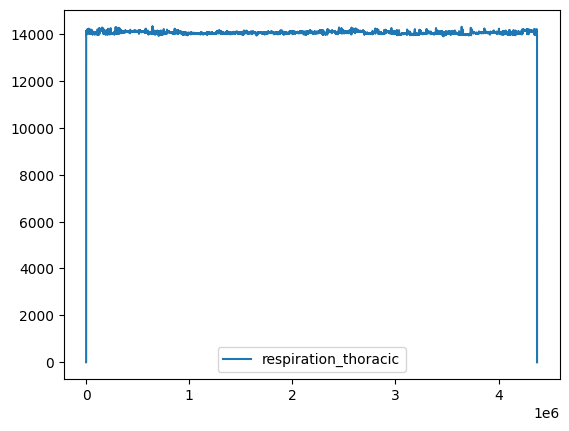

In [57]:
resp_abd.plot()

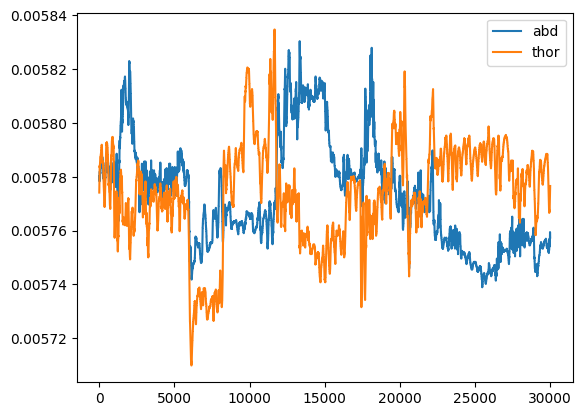

In [50]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
start = 10000
end = 40000#-250

seg_abd = resp_abd[1][start:end]
seg_thor = resp_thor[1][start:end]
seg_abd = preprocessing.normalize([-seg_abd])[0]
seg_thor = preprocessing.normalize([seg_thor])[0]

plt.figure()
plt.plot(-seg_abd)
plt.plot(seg_thor)
plt.legend(['abd', 'thor'])
plt.show()

In [64]:
import json
f = open(path+'/Participant 9/record_250598/info.json')
date_info = json.load(f)

In [66]:
raw_br = wavfile.read(path+'/Participant 9/record_250598/breathing_rate.wav')

In [71]:
len(raw_br[1])

34163

In [108]:
b_ph


,time [s],breathing_phase,ins | exp
0,3.265625,insp,20972.0
1,3.773438,exp,20945.0
2,4.054688,insp,20970.0
3,4.882812,exp,20938.0
4,5.757812,insp,20957.0
...,...,...,...
22057,34150.656250,exp,20831.0
22058,34151.859375,insp,20879.0
22059,34152.679688,exp,20831.0
22060,34154.921875,insp,20912.0


In [80]:
resp_thor = pd.DataFrame(data = resp_thor[1], columns = ['RESP'])
resp_thor

,RESP
0,0
1,0
2,0
3,0
4,13291
...,...
4372899,0
4372900,0
4372901,0
4372902,0


In [109]:

b_ph

,Timestamp,time [s],breathing_phase,ins | exp,Second
0,1.660650e+09,3.265625,insp,20972.0,0.000000
1,1.660650e+09,3.773438,exp,20945.0,0.015625
2,1.660650e+09,4.054688,insp,20970.0,0.031250
3,1.660650e+09,4.882812,exp,20938.0,0.046875
4,1.660650e+09,5.757812,insp,20957.0,0.062500
...,...,...,...,...,...
22057,1.660650e+09,34150.656250,exp,20831.0,344.640625
22058,1.660650e+09,34151.859375,insp,20879.0,344.656250
22059,1.660650e+09,34152.679688,exp,20831.0,344.671875
22060,1.660650e+09,34154.921875,insp,20912.0,344.687500


,Timestamp,RESP,Second
0,1.660650e+09,0,0.000000
1,1.660650e+09,0,0.015625
2,1.660650e+09,0,0.031250
3,1.660650e+09,0,0.046875
4,1.660650e+09,13291,0.062500
...,...,...,...
4372899,1.660718e+09,0,68326.546875
4372900,1.660718e+09,0,68326.562500
4372901,1.660718e+09,0,68326.578125
4372902,1.660718e+09,0,68326.593750


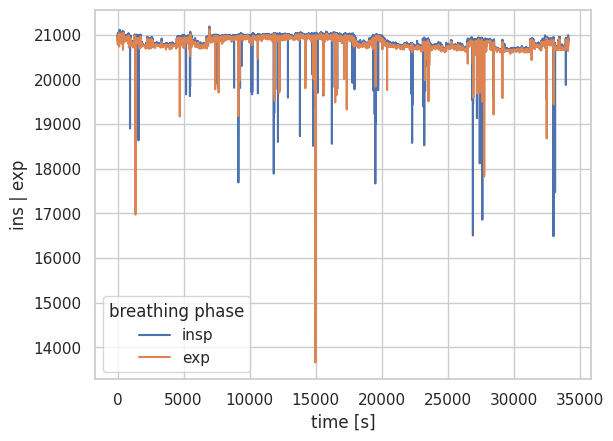

In [164]:
import seaborn as sns


sns.set_theme(style="whitegrid")
plt.figure()
sns.lineplot(data=b_ph, x="time [s]", y="ins | exp", hue="breathing phase")
plt.show()